# 3.  Write a program to perform filtering in spatial domain using a median, max and min filters of size 3 * 3, 5 * 5, 11 * 11. Show results in a subplot.

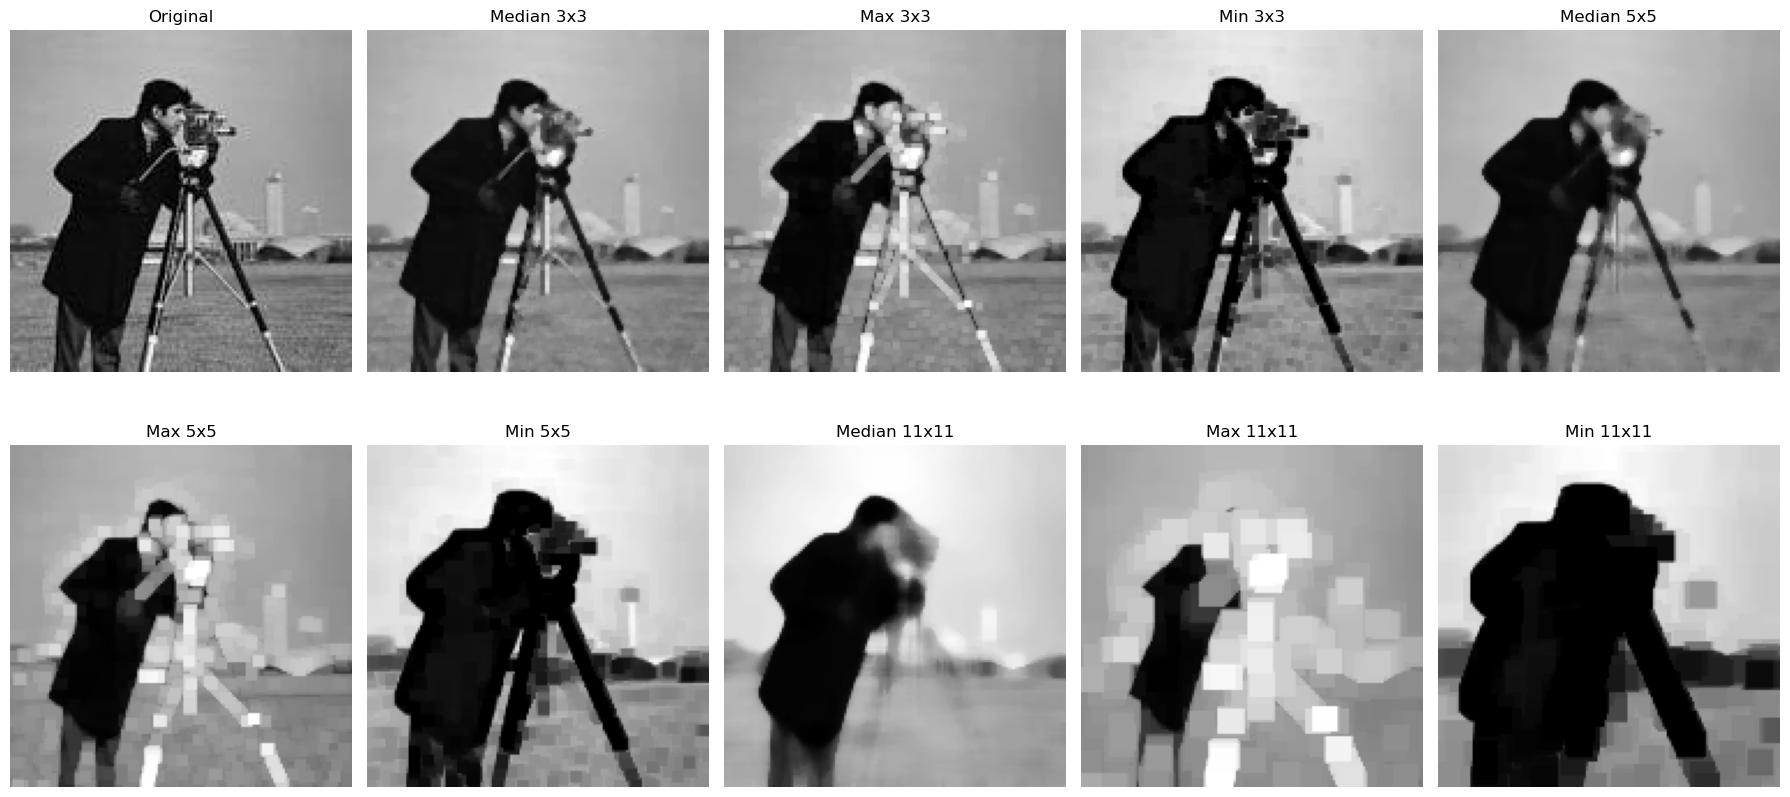

<Figure size 640x480 with 0 Axes>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_img(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error: Unable to read image at {image_path}")
    return img

def apply_filters(image):
    kernel_sizes = [3, 5, 11]
    results = []

    for k in kernel_sizes:
        median = cv2.medianBlur(image, k)
        max_filtered = cv2.dilate(image, np.ones((k, k), np.uint8))
        min_filtered = cv2.erode(image, np.ones((k, k), np.uint8))

        results.append((f"Median {k}x{k}", median))
        results.append((f"Max {k}x{k}", max_filtered))
        results.append((f"Min {k}x{k}", min_filtered))

    return results

def plot_results(original, filtered_results):
    total_images = len(filtered_results) + 1
    cols = 5
    rows = (total_images + cols - 1) // cols

    plt.figure(figsize=(18, 9))
    plt.subplot(rows, cols, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    for i, (title, img) in enumerate(filtered_results, start=2):
        plt.subplot(rows, cols, i)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.savefig("outimg_problem3.png")
    
def main():
    img_path = "../test_imgs/cameraman.jpg" 
    img = read_img(img_path)
    filtered = apply_filters(img)
    plot_results(img, filtered)

if __name__ == "__main__":
    main()
